In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [6]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


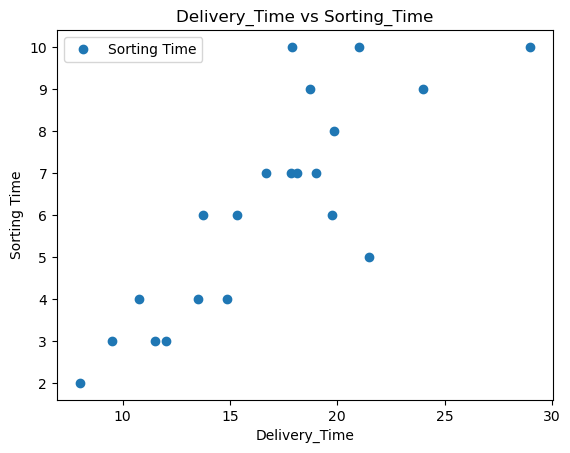

In [7]:
data.plot(x='Delivery Time', y='Sorting Time', style='o') 
plt.title('Delivery_Time vs Sorting_Time')  
plt.xlabel('Delivery_Time') 
plt.ylabel('Sorting Time')
plt.show()

<Axes: xlabel='Delivery Time', ylabel='Density'>

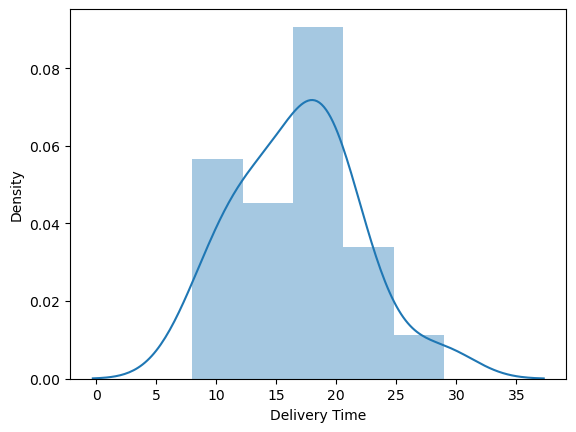

In [8]:
sns.distplot(data['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

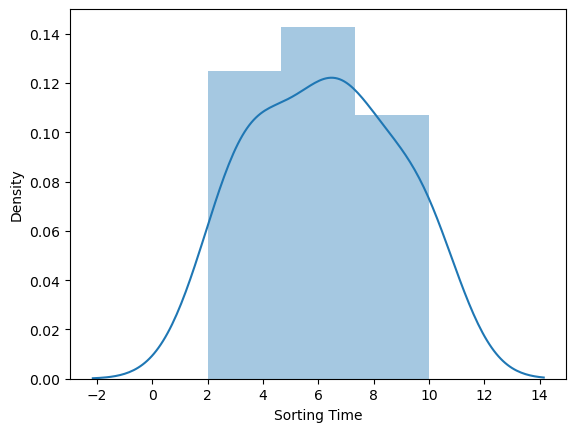

In [9]:
sns.distplot(data['Sorting Time'])

In [10]:
X = data['Delivery Time'].values.reshape(-1,1)
y = data['Sorting Time'].values.reshape(-1,1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Logrithm Transformation Model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

In [13]:
predict_reg = LinearRegression()

In [14]:
X_log = np.log(data['Delivery Time'].values.reshape(-1,1))
y_log = data['Sorting Time'].values.reshape(-1,1)

In [15]:
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [16]:
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [17]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [-10.86864266]
Co-efficient Value of Log Model is :  [[6.09166216]]


In [18]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[7.67755948],
       [6.77563916],
       [5.57895502],
       [4.98606362],
       [6.7045887 ]])

In [19]:
pmsh_pf_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,10,7.677559
1,7,6.775639
2,4,5.578955
3,4,4.986064
4,10,6.704589


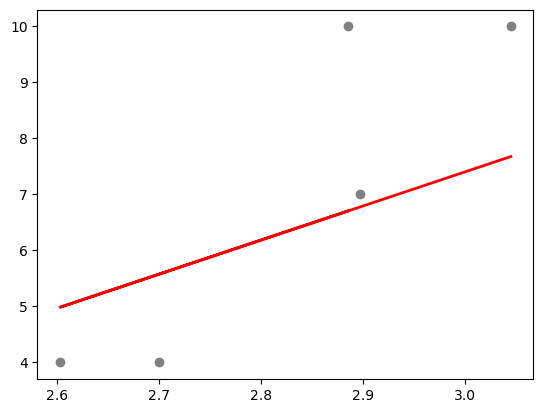

In [20]:
plt.scatter(X_test_1og, Y_test_log,  color='gray')
plt.plot(X_test_1og, l_model, color='red', linewidth=2)
plt.show()

# Exponential Transformation Model

In [21]:
X_e_log = data['Delivery Time'].values.reshape(-1,1)
y_e_log = np.log(data['Sorting Time'].values.reshape(-1,1))

In [22]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_e_log, y_e_log, test_size=0.2, random_state= 42)

In [23]:
exp_model= LinearRegression()
exp_model.fit(X_train_exp, Y_train_exp)

LinearRegression()

In [24]:
print(" Exponent Model Intercept value is ", exp_model.intercept_)
print(" Exponent model Coefficient value is ", exp_model.coef_)

 Exponent Model Intercept value is  [0.4874176]
 Exponent model Coefficient value is  [[0.0717593]]


In [25]:
exp_model_pred= exp_model.predict(X_test_exp)
exp_model_pred

array([[1.99436284],
       [1.78697847],
       [1.55519594],
       [1.45616811],
       [1.77190902]])

In [26]:
pmsh_exp = pd.DataFrame({'Actual':Y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
pmsh_exp

,Actual,Predict
0,2.302585,1.994363
1,1.945910,1.786978
2,1.386294,1.555196
3,1.386294,1.456168
4,2.302585,1.771909


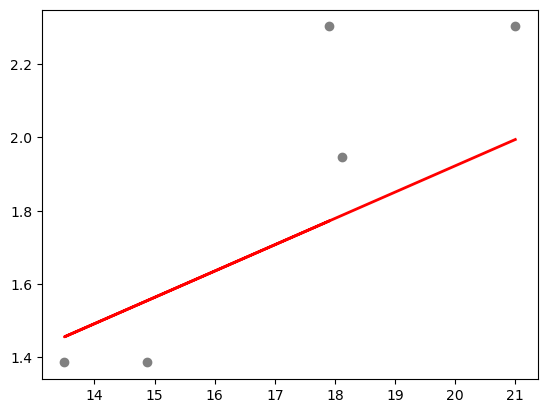

In [27]:
plt.scatter(X_test_exp, Y_test_exp,  color='gray')
plt.plot(X_test_exp, exp_model_pred, color='red', linewidth=2)
plt.show()

In [28]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Quadratic Transformation Model

In [29]:
data['Square_Delivery_Time'] = data.apply(lambda row: row.delivery_time**2, axis =1 )
data.head()

,delivery_time,sorting_time,Square_Delivery_Time
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000


In [30]:
X_q = data.iloc[:,data.columns != 'sorting_time']
Y_q = data.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)

0     10
17     7
15     4
1      4
8     10
Name: sorting_time, dtype: int64


In [31]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [32]:
print(" Intercept value of Model is " ,model.intercept_)
coeff_df = pd.DataFrame(model.coef_,X_q.columns ,columns=['Coefficient'])
print(coeff_df)

 Intercept value of Model is  -3.1484511796800483
                      Coefficient
delivery_time            0.729464
Square_Delivery_Time    -0.010025


In [33]:
y_pred_q_q = model.predict(X_test)

In [34]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_qm.head()

,Actual,Predicted
0,10,7.749130
17,7,6.774119
15,4,5.486224
1,4,4.872199
8,10,6.696744


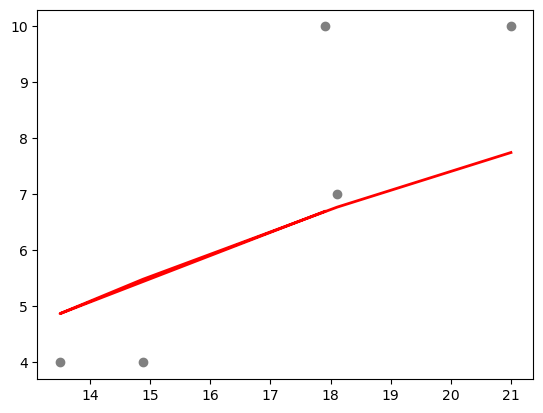

In [35]:
x_t =np.array(X_test)
plt.scatter(x_t[:,0], Y_test,  color='gray')
plt.plot(x_t[:,0], y_pred_q_q, color='red', linewidth=2)
plt.show()

# Polynomial Transformation Model

In [36]:
data['Cube_delivery_time'] = data.apply(lambda row: row.delivery_time**3, axis =1 )
data.head()

,delivery_time,sorting_time,Square_Delivery_Time,Cube_delivery_time
0,21.00,10,441.0000,9261.000000
1,13.50,4,182.2500,2460.375000
2,19.75,6,390.0625,7703.734375
3,24.00,9,576.0000,13824.000000
4,29.00,10,841.0000,24389.000000


In [37]:
X_c = data.iloc[:,data.columns != 'sorting time']
Y_c = data.iloc[:,1]
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=0.2, random_state= 42)
print(Y_test)

0     10
17     7
15     4
1      4
8     10
Name: sorting_time, dtype: int64


In [38]:
cube_model = LinearRegression()
cube_model.fit(X_train_c, Y_train_c)

LinearRegression()

In [39]:
print(" Intercept value of Cubic Model is " ,cube_model.intercept_)

coeff_df = pd.DataFrame(cube_model.coef_, X_c.columns, columns=['Coefficient'])
print(coeff_df)

 Intercept value of Cubic Model is  8.494538406011998e-12
                       Coefficient
delivery_time        -4.458318e-13
sorting_time          1.000000e+00
Square_Delivery_Time  8.928727e-16
Cube_delivery_time   -2.047184e-16


In [40]:
y_pred_cube = cube_model.predict(X_test_c)

In [41]:
df_33 = pd.DataFrame({'Actual':Y_test_c, 'Predicted': y_pred_cube})
df_33.head()

,Actual,Predicted
0,10,10.0
17,7,7.0
15,4,4.0
1,4,4.0
8,10,10.0


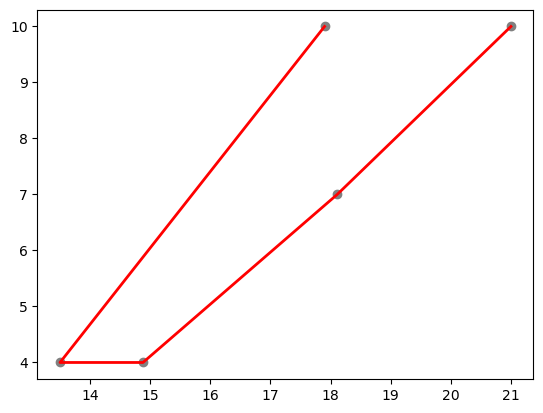

In [42]:
x_t_c =np.array(X_test_c)
plt.scatter(x_t_c[:,0], Y_test_c,  color='gray')
plt.plot(x_t_c[:,0], y_pred_cube, color='red', linewidth=2)
plt.show()

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

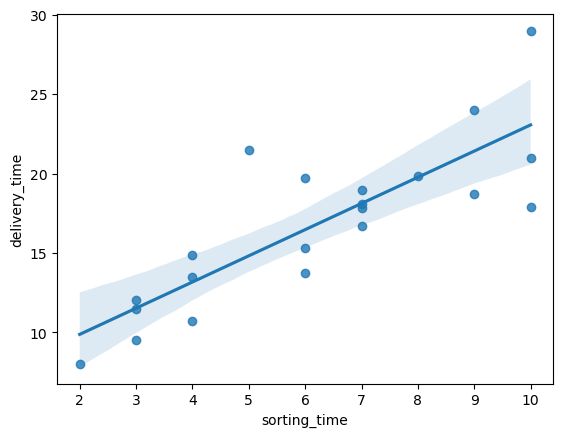

In [43]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import scipy.stats as stats

In [45]:
X = data.iloc[:,1:2]
y = data.iloc[:,0]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

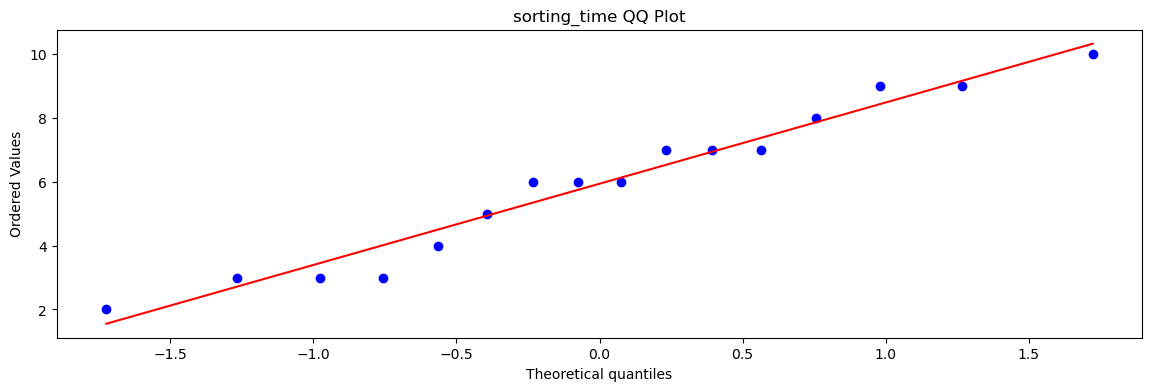

In [47]:
plt.figure(figsize=(14,4))
stats.probplot(X_train['sorting_time'], dist="norm", plot=plt)
plt.title('sorting_time QQ Plot')

plt.show()

# Model Building & Predictions

In [48]:
import statsmodels.formula.api as smf

In [49]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [50]:
model.params 

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [51]:
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [52]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [53]:
model.rsquared  

0.6822714748417231

In [54]:
 model.rsquared_adj   

0.6655489208860244

In [55]:
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [56]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [57]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [58]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64